# **TASK 1: Analyze Student Grades**

In [39]:
#import necessary libraries
import pandas as pd

#Load CSV file
df = pd.read_csv("students_dataset.csv")

#display the first few rows
df.head()

,LastName,FirstName,Psychology,Sociology,Environmental Management
0,Aguilar,Delbert,91,0,98
1,Brown,Camille,54,88,88
2,Bryan,Becky,71,77,88
3,Cannon,Leonard,66,100,91
4,Cobb,Teresa,100,26,26


In [40]:
#calculate average score for each student across subjects
df["Average"] = df[["Psychology", "Sociology", "Environmental Management"]].mean(axis=1).round(2)

# asign grades based on average score
def assign_grade(avg):
    if avg >= 90:
        return "A+"
    elif avg >= 80:
        return "A"
    elif avg >= 70:
        return "B"
    elif avg >= 60:
        return "C"
    elif avg >= 50:
        return "D"
    elif avg >= 40:
        return "E"
    else:
        return "F"
df["Grade"] = df["Average"].apply(assign_grade)


#find the student with the highest average
top_student = df.loc[df["Average"].idxmax()]

print("Student with the Highest Average:")
print(f"{top_student['FirstName']} with Average Score of: {top_student['Average']}\n")

Student with the Highest Average:
Amanda with Average Score of: 98.0



In [41]:
#sort students by average score(descending order)
df_sorted = df.sort_values(by="Average", ascending=False)

print("Top 10 Students by Average:\n")
df_sorted.head(10)

Top 10 Students by Average:



,LastName,FirstName,Psychology,Sociology,Environmental Management,Average,Grade
36,Brooks,Amanda,96,100,98,98.00,A+
70,Butler,Daniel,98,100,95,97.67,A+
57,Hughes,Maria,99,95,97,97.00,A+
24,Carter,Brianna,93,96,99,96.00,A+
63,Bell,Hannah,96,94,98,96.00,A+
21,Hughes,Nathan,100,94,91,95.00,A+
54,Powell,Rachel,94,92,96,94.00,A+
18,Reed,Sophia,90,95,97,94.00,A+
80,Ford,Ryan,94,96,92,94.00,A+
44,Gray,Christina,90,96,94,93.33,A+


In [42]:
#summary statistics of the dataset
print("Summary Statistics:")
print(df[["Psychology", "Sociology", "Environmental Management", "Average"]].describe(), "\n")

Summary Statistics:
       Psychology   Sociology  Environmental Management    Average
count   81.000000   81.000000                 81.000000  81.000000
mean    79.333333   79.827160                 81.160494  80.107901
std     12.767145   15.971686                 12.652526  11.418781
min     54.000000    0.000000                 26.000000  50.670000
25%     70.000000   72.000000                 72.000000  72.670000
50%     80.000000   82.000000                 84.000000  81.330000
75%     90.000000   92.000000                 91.000000  90.000000
max    100.000000  100.000000                 99.000000  98.000000 



# **TASK 2: Visualize Monthly Sales**

In [79]:
#import necessary libraries
import matplotlib.pyplot as plt

#read the dataset
df1 = pd.read_csv("sales_data_sample.csv", encoding="latin1")

# filter only one year(2004)
df_2004 = df1[df1["YEAR_ID"] == 2004]

#display first 5 rows
df_2004.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
9,10211,41,100.0,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,...,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium
10,10223,37,100.0,1,3965.66,2/20/2004 0:00,Shipped,1,2,2004,...,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium
11,10237,23,100.0,7,2333.12,4/5/2004 0:00,Shipped,2,4,2004,...,2678 Kingston Rd.,Suite 101,NYC,NY,10022,USA,NaN,Frick,Michael,Small
12,10251,28,100.0,2,3188.64,5/18/2004 0:00,Shipped,2,5,2004,...,7476 Moss Rd.,NaN,Newark,NJ,94019,USA,NaN,Brown,William,Medium
13,10263,34,100.0,2,3676.76,6/28/2004 0:00,Shipped,2,6,2004,...,25593 South Bay Ln.,NaN,Bridgewater,CT,97562,USA,NaN,King,Julie,Medium


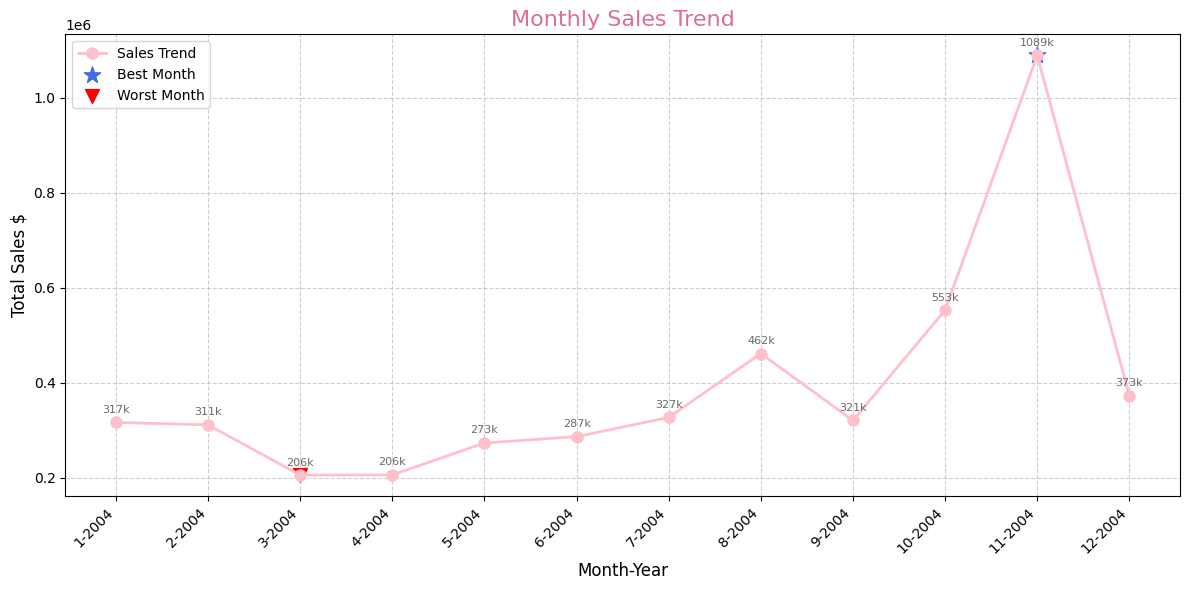

In [81]:
# group sales by month and year
monthly_sales = df_2004.groupby(["YEAR_ID", "MONTH_ID"])["SALES"].sum().reset_index()

# make a column for x-axis labels
monthly_sales["Month_Year"] = monthly_sales["MONTH_ID"].astype(str) + "-" + monthly_sales["YEAR_ID"].astype(str)

#plot the sales trend
plt.figure(figsize=(12,6))
plt.plot(monthly_sales["Month_Year"], monthly_sales["SALES"],
         marker="o", markersize=8, color="pink", linewidth=2, label="Sales Trend")
#Add labels above each point
for x, y in zip(monthly_sales["Month_Year"], monthly_sales["SALES"]):
    plt.text(x, y+20000, f"{y/1000:.0f}k", ha="center", fontsize=8, color="dimgray")

#highlight the max and min pointss
best = monthly_sales.loc[monthly_sales["SALES"].idxmax()]
worst = monthly_sales.loc[monthly_sales["SALES"].idxmin()]
plt.scatter(best["Month_Year"], best["SALES"], color="royalblue", s=150, marker="*", label="Best Month")
plt.scatter(worst["Month_Year"], worst["SALES"], color="red", s=100, marker="v", label="Worst Month")

# labels, title and legend
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Total Sales $", fontsize=12)
plt.title("Monthly Sales Trend", fontsize=16, color="palevioletred")

#rotate labels so they fit
plt.xticks(rotation=45, ha="right")

#grid and legend
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()

# **TASK 3: Analyze Survey Results**

In [60]:
#import necessary libraries
import seaborn as sns

#load the dataset
df2 = pd.read_csv("Customer-survey-data.csv")

df2.head()

,Customer,How satisfied were you with your overall delivery experience? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the quality of the food? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the speed of delivery? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,Was your order accurate? Please respond yes or no.
0,1,5,3,4,Yes
1,2,3,4,3,Yes
2,3,4,5,2,Yes
3,4,5,3,4,Yes
4,5,2,5,1,Yes


In [61]:
#mapping
mapping = {
    5: "Very Satisfied",
    4: "Satisfied",
    3: "Neutral",
    2: "Dissatisfied",
    1: "Very Dissatisfied"
}

# find all satisfaction columns automatically
satisfaction_columns = [col for col in df2.columns if "satisfied" in col.lower()]

# apply mapping safely
for col in satisfaction_columns:
    df2[col] = pd.to_numeric(df2[col], errors="coerce").astype("Int64")  # handles NaN
    df2[col] = df2[col].map(mapping)

In [62]:
#save updated dataset
df2.to_csv("survey_data_updated.csv", index=False)
df2.head()

,Customer,How satisfied were you with your overall delivery experience? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the quality of the food? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the speed of delivery? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,Was your order accurate? Please respond yes or no.
0,1,Very Satisfied,Neutral,Satisfied,Yes
1,2,Neutral,Satisfied,Neutral,Yes
2,3,Satisfied,Very Satisfied,Dissatisfied,Yes
3,4,Very Satisfied,Neutral,Satisfied,Yes
4,5,Dissatisfied,Very Satisfied,Very Dissatisfied,Yes


In [82]:
# pick only satisfaction columns ignoring Customer and last column
satisfaction_columns = [
    col for col in df2.columns
    if "satisfied" in col.lower() or "delivery" in col.lower() or "food" in col.lower()
]

# stacking all satisfaction answers into a single series
all_responses = df2[satisfaction_columns].stack()

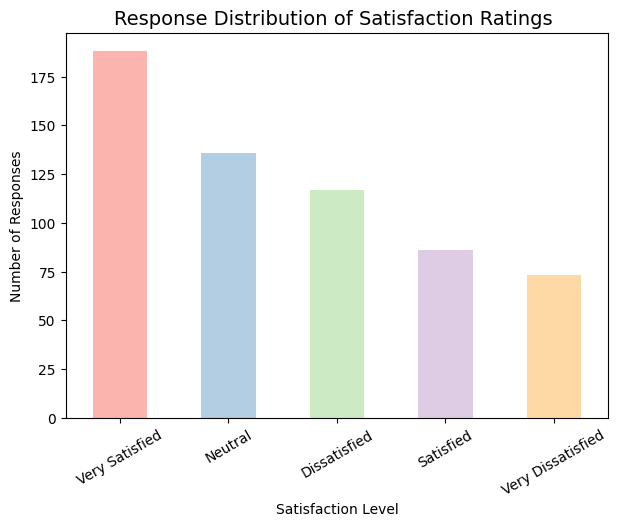

In [83]:
#count occurrences of each level
counts = all_responses.value_counts()

#bar chart
plt.figure(figsize=(7,5))
counts.plot(
    kind="bar",color=plt.cm.Pastel1.colors[:len(counts)]
)
plt.title("Response Distribution of Satisfaction Ratings ", fontsize=14)
plt.xlabel("Satisfaction Level")
plt.ylabel("Number of Responses")
plt.xticks(rotation=30)
plt.show()

# **TASK 4: Basic Descriptive Statistics on Dataset**

In [73]:
#load the Penguins dataset from Seaborn
df3 = sns.load_dataset("penguins")

# Show first few rows
print("First 5 rows of the Penguins dataset:\n")
df3.head()

First 5 rows of the Penguins dataset:



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [74]:
#identify miissing values
print("Missing Values in Each Column:\n")
df3.isnull().sum()

Missing Values in Each Column:



,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [75]:
#filing missing numeric values with mean,median and mode
df3["bill_length_mm"] = df3["bill_length_mm"].fillna(df3["bill_length_mm"].mean())
df3["bill_depth_mm"] = df3["bill_depth_mm"].fillna(df3["bill_depth_mm"].median())
df3["flipper_length_mm"] = df3["flipper_length_mm"].fillna(df3["flipper_length_mm"].mean())
df3["body_mass_g"] = df3["body_mass_g"].fillna(df3["body_mass_g"].median())
df3["sex"] = df3["sex"].fillna(df3["sex"].mode()[0])


In [77]:
#check to see no missing values are left
df3.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [78]:
#descriptive statistics
df3.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.152035,200.915205,4200.872093
std,5.443643,1.969060,14.020657,799.696532
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000
